<h1>K-Nearest Neighbors</h1>

Der Parameter K beschreibt wie viele Datenpunkte angeschaut werden, um die Zugehörigkeit festzustellen. 

Dabei wird die Entfernung von dem ausgehenden Punkt zu den K-Nachbarn gemessen, z. B. mit der Euklidischen Distanz. 

<i>Abb1:</i> KNN, 3 Klassen, K = 2.

<img src="files_data/img/sklearn_knn_1.PNG" width=600 hight= 400>

In der Abbildung 1 sind die grünen Punkte am nächsten dran. Deswegen gehört der pinke Punkt dem grünen Cluster an.

<i>Abb2:</i> Verschiedene Werte für K.

<img src="files_data/img/sklearn_knn_2.PNG" width=900 hight= 400>

Ein Problem was auftauchen kann ist, dass wenn der Wert von K sehr hoch ist, viele andere Datenpunkte in Betracht  gezogen werden, um die Zugehörigkeit zu bestimmen, was zu einer falschen Klassifikation führt. <br>


Der Wert von K muss also vorsichtig ausgewählt werden.

Wir können KNN an dem Iris Dataset testen.

In [5]:
import pandas as pd

from sklearn.datasets  import load_iris
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score  # Cross Validation 

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [13]:
# Lade Iris Daten.
iris_data = load_iris()
dir(iris_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [14]:
# Erstelle Dataframe
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
# Füge Target hinzu
iris_df = pd.concat([iris_df, pd.DataFrame(iris_data.target, columns=['flower'])], axis='columns')
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


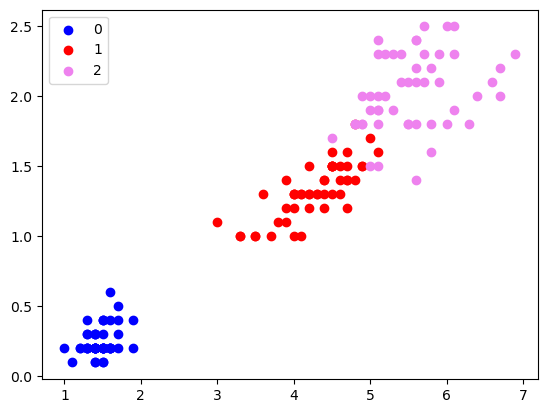

In [119]:
%matplotlib inline

classes = [0, 1, 2]
colors  = ['blue', 'red', 'violet']
for i in classes:
    plt.scatter(iris_df.loc[ iris_df['flower']==i, ['petal length (cm)']] , \
            iris_df.loc[ iris_df['flower']==i, ['petal width (cm)']], color=colors[i], label=i)
plt.legend()

Jetzt kann das Model erstellt und trainiert werden.

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors ist der Parameter "K".

In [32]:
# Prüfe Score mit Cross Validation. 
cross_val_score(knn, iris_df[['petal length (cm)','petal width (cm)']], \
               iris_df['flower'], cv=3)
             

array([0.98, 0.94, 0.96])

<h3>Boundary Plot</h3>

Bei einem einfachen Dataset können die Grenzen geplottet werden, dadurch wird sichtbar wie das Model entschscheidungen trifft.

In [109]:
X, y  = iris_df[['sepal length (cm)', 'sepal width (cm)']], iris_df['flower']

In [110]:
from sklearn.inspection import DecisionBoundaryDisplay
# Model wird in der Funktion erstellt. 
def plot_boundary(plot_scala=[0, 8, 0, 3.5], boundary=False, **model_param):
    
    model = KNeighborsClassifier(**model_param).fit(X, y)

    _, ax = plt.subplots(figsize=(6, 6))
    ax.set(xlim=(plot_scala[0], plot_scala[1]),\
           ylim=(plot_scala[2], plot_scala[3]))
    
    common_params = {"estimator": model, "X": X, "ax": ax}
    # Feld
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="auto",    # predict bei 2 Klassen
        plot_method="pcolormesh",  # {'contourf', 'contour', 'pcolormesh'}
        alpha=0.3,
    )
    # Boundary
    if boundary:
        DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="auto",  # decision_function bei 2 Klassen
            plot_method="contour",
            levels=[-1, 0, 1],
            colors=["k", "k", "k"],
            linestyles=["--", "-", "--",],
        )
    

    ax.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(model_param['n_neighbors'])
    plt.show()

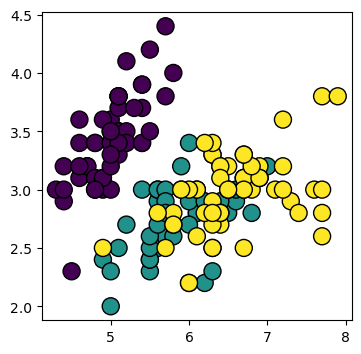

In [111]:
fig, ax = plt.subplots(figsize=(4, 4))
scatter = ax.scatter(X['sepal length (cm)'], X['sepal width (cm)'], s=150, c=y, label=y, edgecolors="k")

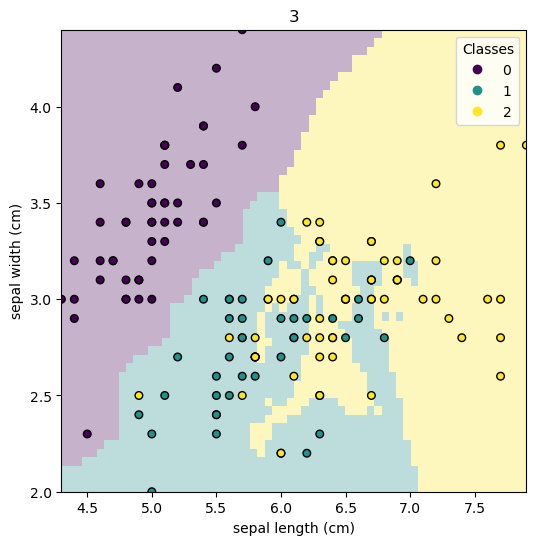

In [112]:
# Passe Werte an, sonst Plot verschoben. 
skalar = [min(X['sepal length (cm)']), max(X['sepal length (cm)']),\
          min(X['sepal width (cm)']), max(X['sepal width (cm)'])]
plot_boundary(plot_scala=skalar, n_neighbors=3)

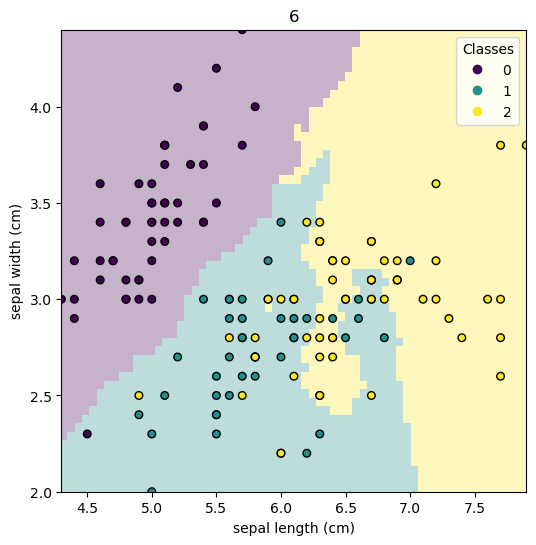

In [84]:
plot_boundary(plot_scala=skalar, n_neighbors=6)

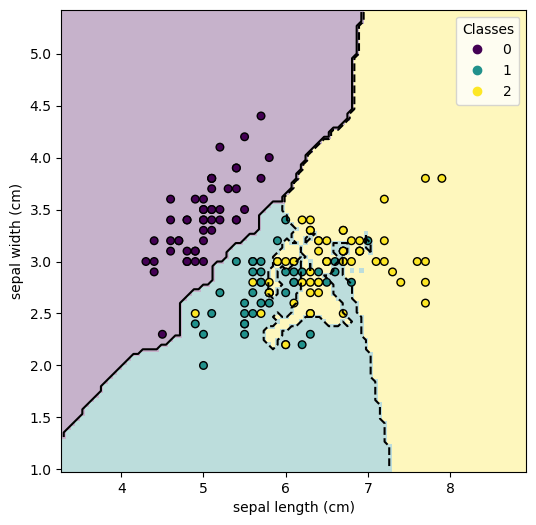

In [118]:
# Minimales Beispiel:

# Model.
model = KNeighborsClassifier(n_neighbors=3).fit(X, y)
# Skalar für Plot. 
skalar = [min(X['sepal length (cm)']), max(X['sepal length (cm)']),\
          min(X['sepal width (cm)']), max(X['sepal width (cm)'])]

_, ax = plt.subplots(figsize=(6, 6))

# Plot für Felder. 
common_params = {"estimator": model, "X": X, "ax": ax}
DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="auto",    # predict bei 2 Klassen
        plot_method="pcolormesh",  # {'contourf', 'contour', 'pcolormesh'}
        alpha=0.3,
    )

ax.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=y, s=30, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")

Alternativ kann es so durchgeführt werden.:

In [87]:
# Meshgrid:
xx, yy = np.meshgrid(np.arange(skalar[0], skalar[1], 0.02),
                     np.arange(skalar[2], skalar[3], 0.02))

C:\Users\Alexander\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision Boundary')

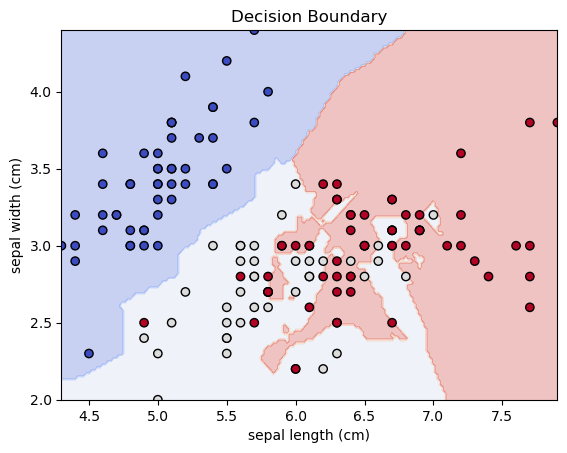

In [100]:
# Model.
model = KNeighborsClassifier(n_neighbors=3).fit(X,y)

# Predictions.
pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

# Plot.
plt.contourf(xx, yy, pred, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Decision Boundary')